# **0. PREPARATION AND LIBRARIES**

In [1]:
!pip install opendatasets

In [2]:
! pip install ultralytics

In [3]:
import os

In [4]:
import random
import opendatasets as od
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import sys
import os

from ultralytics import YOLO
%matplotlib inline

In [5]:
# drive.mount('/content/drive')

In [6]:
# move to preferred working directory

# %cd "/content/drive/MyDrive/REA Projects/Object Detection/Playing Card Detection"

In [7]:
# set working directory

HOME = os.getcwd()
print(HOME)

/home


# **1. DOWNLOAD DATASET**

In [8]:
# define train, valid, test directories


train_images = os.path.join(HOME, "playing-cards-object-detection-dataset/train/images")
train_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/train/labels")

valid_images = os.path.join(HOME, "playing-cards-object-detection-dataset/valid/images")
valid_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/valid/labels")

test_images = os.path.join(HOME, "playing-cards-object-detection-dataset/test/images")
test_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/test/labels")

yaml_path = os.path.join(HOME, "playing-cards-object-detection-dataset/data.yaml")

In [9]:
print(train_images)
print(valid_images)
print(test_images)


/home/playing-cards-object-detection-dataset/train/images
/home/playing-cards-object-detection-dataset/valid/images
/home/playing-cards-object-detection-dataset/test/images


In [10]:
yaml_path

'/home/playing-cards-object-detection-dataset/data.yaml'

In [11]:
# Configure YAML

# %writefile "$yaml_path"

# train: ./playing-cards-object-detection-dataset/train/images
# val: ./playing-cards-object-detection-dataset/val/images
# test: ./playing-cards-object-detection-dataset/test/images

# nc: 52
# names: ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']

In [12]:
# Define the YAML content as a string
yaml_content = """
train: ./playing-cards-object-detection-dataset/train/images
val: ./playing-cards-object-detection-dataset/valid/images
test: ./playing-cards-object-detection-dataset/test/images

nc: 52
names: ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']
"""

# Write the YAML content to a file
# with open(yaml_path, 'w') as file:
  #  file.write(yaml_content)

In [13]:
# Define the labels

classes = ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']

Idx2Label = {idx: label for idx, label in enumerate(classes)}
Label2Index = {label: idx for idx, label in Idx2Label.items()}

print('Index to Label Mapping:', Idx2Label)
print('Label to Index Mapping:', Label2Index)

Index to Label Mapping: {0: '10c', 1: '10d', 2: '10h', 3: '10s', 4: '2c', 5: '2d', 6: '2h', 7: '2s', 8: '3c', 9: '3d', 10: '3h', 11: '3s', 12: '4c', 13: '4d', 14: '4h', 15: '4s', 16: '5c', 17: '5d', 18: '5h', 19: '5s', 20: '6c', 21: '6d', 22: '6h', 23: '6s', 24: '7c', 25: '7d', 26: '7h', 27: '7s', 28: '8c', 29: '8d', 30: '8h', 31: '8s', 32: '9c', 33: '9d', 34: '9h', 35: '9s', 36: 'Ac', 37: 'Ad', 38: 'Ah', 39: 'As', 40: 'Jc', 41: 'Jd', 42: 'Jh', 43: 'Js', 44: 'Kc', 45: 'Kd', 46: 'Kh', 47: 'Ks', 48: 'Qc', 49: 'Qd', 50: 'Qh', 51: 'Qs'}
Label to Index Mapping: {'10c': 0, '10d': 1, '10h': 2, '10s': 3, '2c': 4, '2d': 5, '2h': 6, '2s': 7, '3c': 8, '3d': 9, '3h': 10, '3s': 11, '4c': 12, '4d': 13, '4h': 14, '4s': 15, '5c': 16, '5d': 17, '5h': 18, '5s': 19, '6c': 20, '6d': 21, '6h': 22, '6s': 23, '7c': 24, '7d': 25, '7h': 26, '7s': 27, '8c': 28, '8d': 29, '8h': 30, '8s': 31, '9c': 32, '9d': 33, '9h': 34, '9s': 35, 'Ac': 36, 'Ad': 37, 'Ah': 38, 'As': 39, 'Jc': 40, 'Jd': 41, 'Jh': 42, 'Js': 43, 'K

# **2. EXPLORE DATASET**

In [14]:
def visualize_image_with_annotation_bboxes(image_dir, label_dir):
    # Get list of all the image files in the directory
    image_files = sorted(os.listdir(image_dir))

    # Choose 10 random image files from the list
    sample_image_files = random.sample(image_files, 12)

    # Set up the plot
    fig, axs = plt.subplots(4, 3, figsize=(15, 20))

    # Loop over the random images and plot the bounding boxes
    for i, image_file in enumerate(sample_image_files):
        row = i // 3
        col = i % 3

        # Load the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load the labels for this image
        label_path = os.path.join(label_dir, image_file[:-4] + '.txt')
        f = open(label_path, 'r')

        # Loop over the labels and plot the bounding boxes
        for label in f:
            class_id, x_center, y_center, width, height = map(float, label.split())
            h, w, _ = image.shape
            x_min = int((x_center - width/2) * w)
            y_min = int((y_center - height/2) * h)
            x_max = int((x_center + width/2) * w)
            y_max = int((y_center + height/2) * h)
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image, Idx2Label[int(class_id)], (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

        axs[row, col].imshow(image)
        axs[row, col].axis('off')

    plt.show()

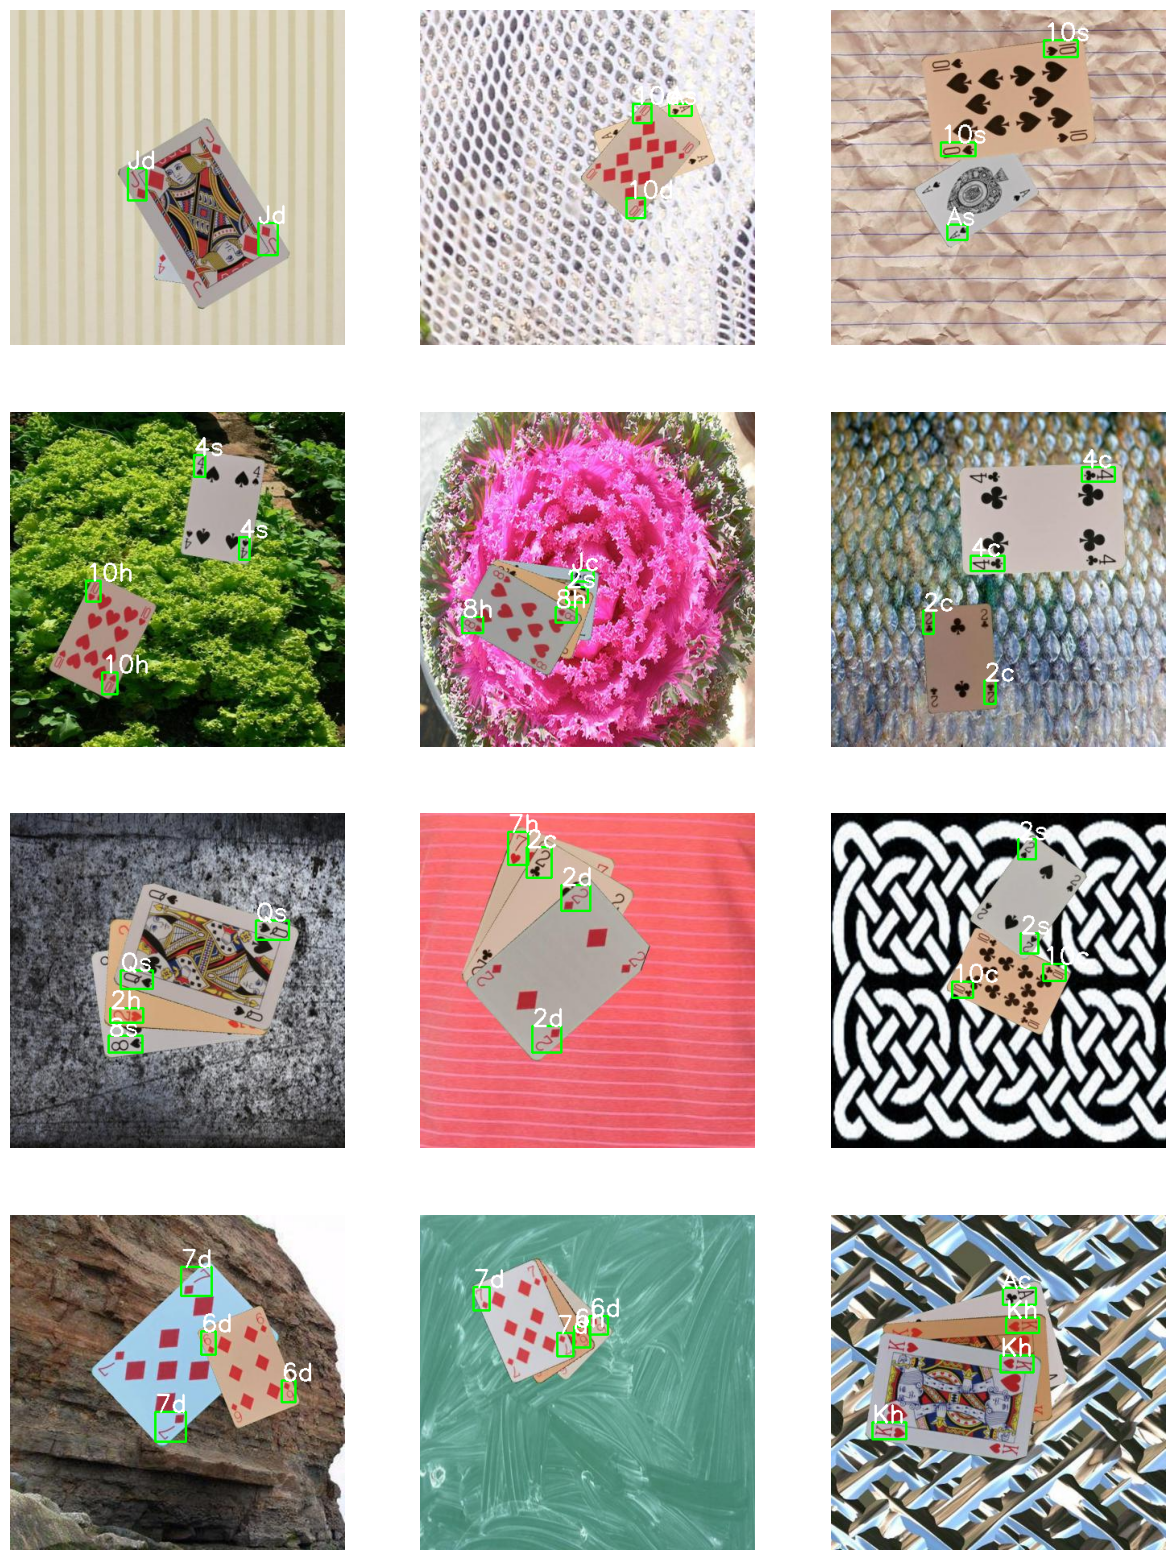

In [15]:
# Visualize 6 sample images with bounding boxes

visualize_image_with_annotation_bboxes(train_images, train_labels)

In [16]:
# Read a image by path
image_path = os.path.join(train_images, os.listdir(train_images)[-1])
image = cv2.imread(image_path)

# Get the size of the image
height, width, channels = image.shape
print('The image has dimensions {}x{} and {} channels'.format(height, width, channels))

The image has dimensions 416x416 and 3 channels


# **3. TRAINING**

In [17]:
# Load a pretrained nano model
model = YOLO('yolov8n.pt')

# free up GPU memory
torch.cuda.empty_cache()

# Training the model
results = model.train(
    data= yaml_path,
    epochs = 100,
    imgsz = (height, width, channels),
    seed = 42,
    batch = 8,
    workers = 4,
    patience = 5,
    name = 'yolov8n_custom')

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7967MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/playing-cards-object-detection-dataset/data.yaml, epochs=30, time=None, patience=5, batch=8, imgsz=(416, 416, 3), save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolov8n_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

train: Scanning /home/playing-cards-object-detection-dataset/train/labels.cache... 14000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14000/14000 [00:00<?, ?it/s]
val: Scanning /home/playing-cards-object-detection-dataset/valid/labels.cache... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000179, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8n_custom
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30     0.847G      1.402      4.502      0.963         37        416: 100%|██████████| 1750/1750 [01:13<00:00, 23.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:11<00:00, 21.99it/s]


                   all       4000      15159     0.0493      0.152     0.0393      0.031

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30     0.893G     0.9563      2.982     0.8522         48        416: 100%|██████████| 1750/1750 [01:09<00:00, 25.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:11<00:00, 21.77it/s]


                   all       4000      15159      0.166      0.394      0.182       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30     0.887G     0.8561      2.404     0.8401         46        416: 100%|██████████| 1750/1750 [01:08<00:00, 25.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:11<00:00, 22.70it/s]


                   all       4000      15159      0.344      0.584      0.406      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30     0.877G     0.8004      1.956     0.8332         37        416: 100%|██████████| 1750/1750 [01:07<00:00, 25.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.75it/s]


                   all       4000      15159      0.552      0.696      0.657      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      0.87G     0.7642       1.62     0.8279         26        416: 100%|██████████| 1750/1750 [01:07<00:00, 25.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.63it/s]


                   all       4000      15159      0.679      0.777      0.777       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30     0.866G     0.7269      1.381     0.8241         54        416: 100%|██████████| 1750/1750 [01:07<00:00, 26.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.81it/s]


                   all       4000      15159      0.745      0.819      0.843      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30     0.864G     0.7088      1.234     0.8213         44        416: 100%|██████████| 1750/1750 [01:08<00:00, 25.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.96it/s]


                   all       4000      15159        0.8      0.848       0.88      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30     0.862G     0.6921      1.126     0.8184         46        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.79it/s]


                   all       4000      15159      0.822      0.873      0.902       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      0.86G     0.6809      1.053     0.8168         40        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.19it/s]

                   all       4000      15159      0.831      0.896      0.918      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      0.86G     0.6643     0.9875     0.8147         50        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.96it/s]

                   all       4000      15159      0.856      0.905      0.935      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      0.86G     0.6507     0.9407     0.8125         65        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.09it/s]

                   all       4000      15159      0.878      0.907      0.947      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      0.86G     0.6464     0.9004     0.8121         60        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.70it/s]

                   all       4000      15159      0.876      0.916      0.947      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30     0.858G     0.6335     0.8595     0.8098         40        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.25it/s]

                   all       4000      15159      0.885      0.924      0.955      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30     0.858G     0.6272     0.8284     0.8108         35        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.02it/s]

                   all       4000      15159      0.894      0.932      0.961      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30     0.858G      0.622     0.8102     0.8081         35        416: 100%|██████████| 1750/1750 [01:07<00:00, 25.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.84it/s]

                   all       4000      15159      0.895      0.935      0.962      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30     0.858G     0.6139     0.7763     0.8073         50        416: 100%|██████████| 1750/1750 [01:08<00:00, 25.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.99it/s]

                   all       4000      15159      0.921      0.928      0.969      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30     0.858G     0.6041     0.7544     0.8064         46        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.75it/s]

                   all       4000      15159      0.909      0.945      0.969      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30     0.858G     0.5972      0.734     0.8064         44        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.22it/s]

                   all       4000      15159      0.917      0.942      0.971      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30     0.858G     0.5956     0.7248     0.8055         47        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.26it/s]

                   all       4000      15159      0.913      0.949       0.97      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30     0.858G     0.5884     0.7075     0.8059         36        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.14it/s]


                   all       4000      15159      0.923      0.949      0.974      0.873
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30     0.854G      0.523     0.5552     0.7951         30        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.18it/s]

                   all       4000      15159      0.917      0.954      0.973      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30     0.854G     0.5079     0.5337     0.7938         25        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.29it/s]

                   all       4000      15159      0.914      0.957      0.973      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30     0.854G     0.5028     0.5202     0.7933         30        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.29it/s]

                   all       4000      15159      0.926      0.958      0.976      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30     0.854G     0.4968     0.5092     0.7917         31        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.80it/s]

                   all       4000      15159      0.924      0.956      0.975      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30     0.854G     0.4944     0.4993      0.792         28        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.32it/s]

                   all       4000      15159      0.928      0.957      0.976      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30     0.854G     0.4896     0.4908     0.7915         30        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.04it/s]

                   all       4000      15159      0.931       0.96      0.978      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30     0.851G     0.4848     0.4823     0.7904         28        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.14it/s]

                   all       4000      15159      0.931      0.961      0.978      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30     0.854G     0.4832     0.4788     0.7896         29        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.03it/s]

                   all       4000      15159      0.932      0.956      0.977       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30     0.851G     0.4797     0.4719     0.7903         31        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.21it/s]

                   all       4000      15159       0.93      0.961      0.977       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30     0.854G     0.4775     0.4661     0.7903         30        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.40it/s]

                   all       4000      15159      0.934      0.959      0.978       0.89



30 epochs completed in 0.637 hours.
Optimizer stripped from runs/detect/yolov8n_custom/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_custom/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_custom/weights/best.pt...
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7967MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:11<00:00, 22.38it/s]


                   all       4000      15159      0.934      0.959      0.978       0.89
                   10c        180        282      0.892      0.965      0.984      0.856
                   10d        188        290       0.93      0.952      0.984      0.853
                   10h        201        322      0.907      0.943      0.979      0.848
                   10s        165        250      0.955      0.964       0.99      0.856
                    2c        193        295      0.951      0.984      0.992       0.92
                    2d        167        259      0.954      0.969      0.991      0.913
                    2h        187        294       0.97       0.98      0.993      0.909
                    2s        192        299      0.993       0.96      0.993      0.917
                    3c        201        308      0.945       0.99      0.992       0.93
                    3d        167        250      0.939      0.976      0.989      0.915
                    3

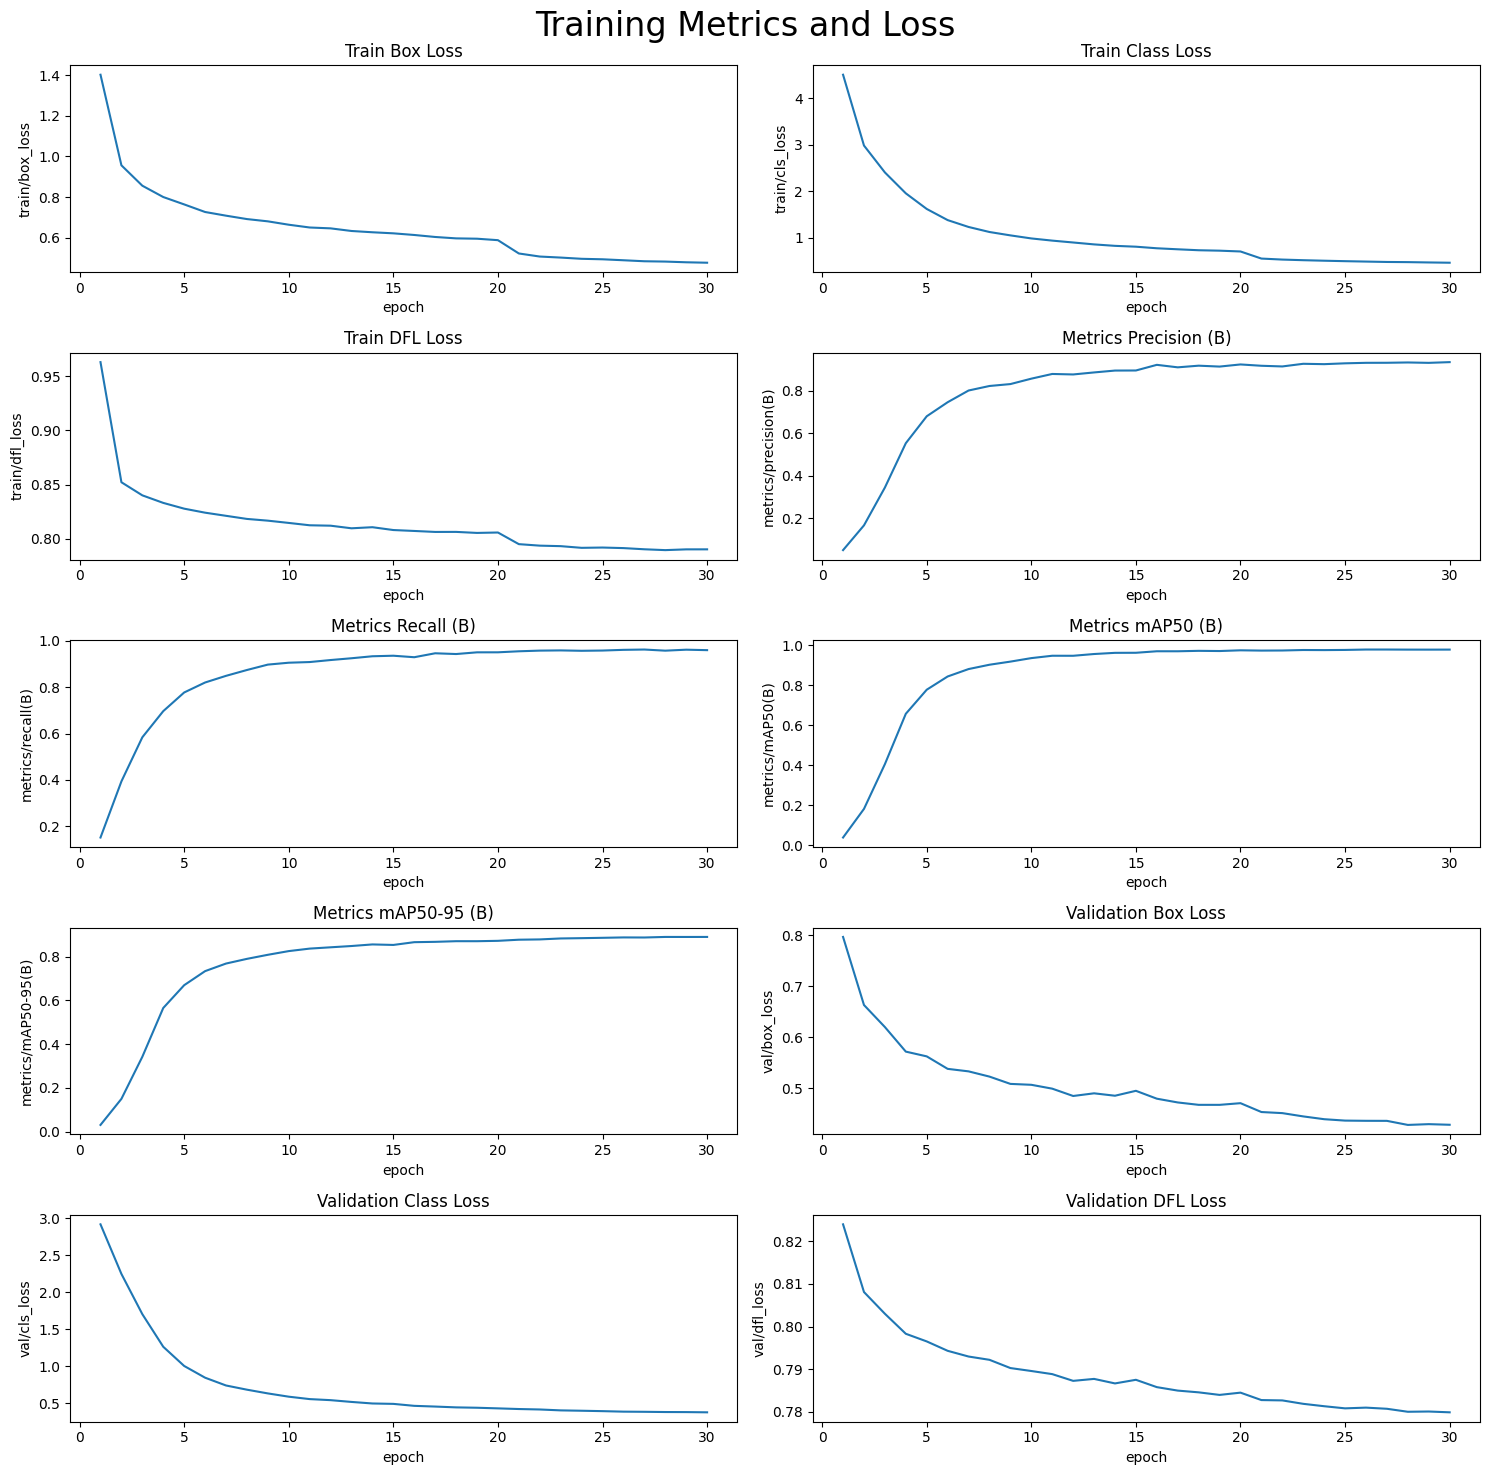

In [18]:
# plot the result

%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('./runs/detect/yolov8n_custom/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# **4. EVALUATION**

In [19]:
# Loading the best performing model
model = YOLO('./runs/detect/yolov8n_custom/weights/best.pt')

# Evaluating the model on test dataset
metrics = model.val(conf=0.25, split='test')

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7967MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/playing-cards-object-detection-dataset/test/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:06<00:00, 19.28it/s]


                   all       2000       7588      0.937      0.959      0.977      0.905
                   10c         89        137      0.931      0.971      0.985      0.872
                   10d        103        170      0.973      0.965      0.992      0.886
                   10h        100        149      0.965      0.933      0.988      0.864
                   10s         96        151      0.973      0.943      0.989      0.883
                    2c         90        139      0.934      0.993      0.992      0.932
                    2d        101        158      0.969      0.962       0.99      0.921
                    2h        100        156      0.961      0.959      0.988      0.922
                    2s         95        153       0.98      0.966      0.989      0.921
                    3c         98        155      0.933      0.981      0.989      0.935
                    3d         95        143      0.961      0.965      0.987      0.928
                    3

In [20]:
print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")
print(f"Mean Average Precision @ .50   : {metrics.box.map50}")
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")

Mean Average Precision @.5:.95 : 0.905177217655743
Mean Average Precision @ .50   : 0.9774813850414648
Mean Average Precision @ .70   : 0.9768148968482406


# **5. PREDICTION**

In [21]:
# Function to perform detections with trained model
def predict_detection(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Pass the image through the detection model and get the result
    detect_result = model(image)

    # Plot the detections
    detect_image = detect_result[0].plot()

    # Convert the image to RGB format
    detect_image = cv2.cvtColor(detect_image, cv2.COLOR_BGR2RGB)

    return detect_image


0: 416x416 2 7cs, 1 Kd, 2.9ms
Speed: 0.5ms preprocess, 2.9ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 9ss, 4 Ahs, 3.1ms
Speed: 0.6ms preprocess, 3.1ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 10s, 1 4h, 2 4ss, 3.3ms
Speed: 0.5ms preprocess, 3.3ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 8ss, 1 Ac, 1 Kh, 3.1ms
Speed: 0.5ms preprocess, 3.1ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 10cs, 2 Kcs, 3.2ms
Speed: 0.5ms preprocess, 3.2ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 3ds, 4 8hs, 3.0ms
Speed: 0.6ms preprocess, 3.0ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 4cs, 2 7ds, 3.2ms
Speed: 0.5ms preprocess, 3.2ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 3 Ass, 2 Kcs, 3.1ms
Speed: 0.6ms preprocess, 3.1ms inference, 0.6ms postprocess p

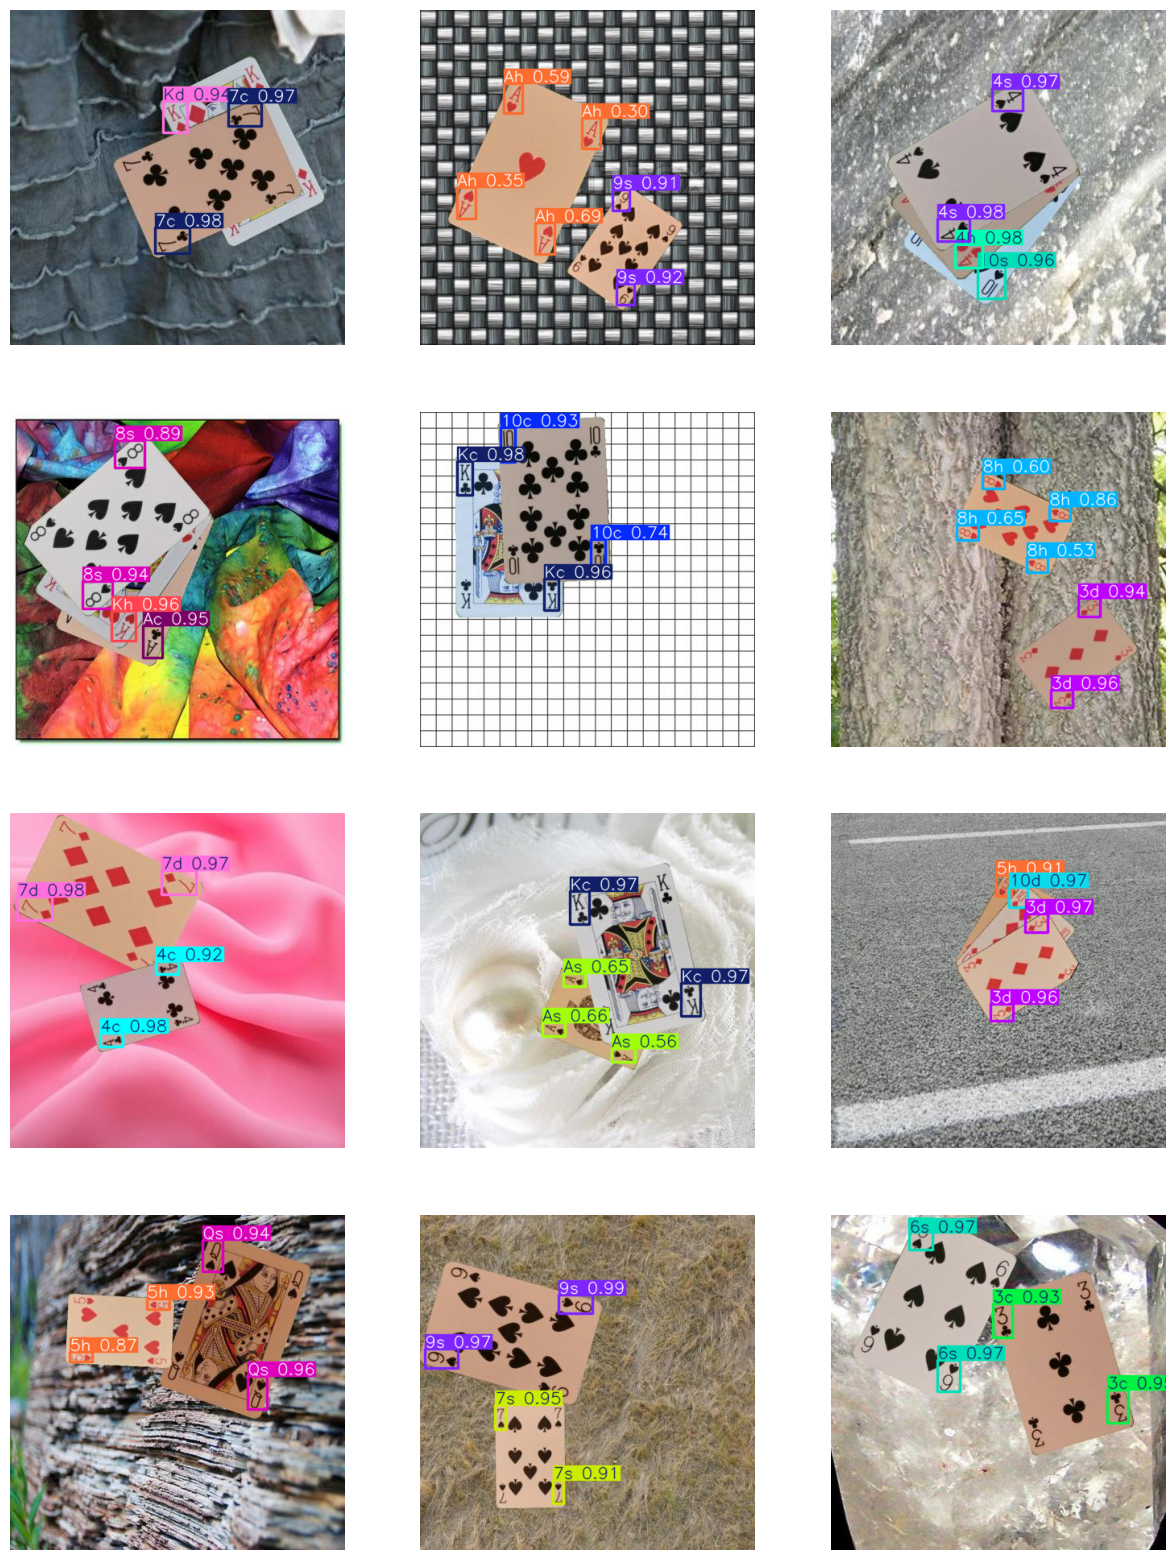

In [22]:
# Get list of all the image files in the test directory
image_files = sorted(os.listdir(test_images))

# Choose 12 random image files from the list
sample_image_files = random.sample(image_files, 12)

# Set up the plot
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# Loop over the random images and plot the detections of the trained model
for i, image_file in enumerate(sample_image_files):
    row = i // 3
    col = i % 3

    # Load the current image and run object detection
    image_path = os.path.join(test_images, image_file)
    detect_image = predict_detection(image_path)

    axs[row, col].imshow(detect_image)
    axs[row, col].axis('off')

plt.show()